In [60]:
import pandas as pd
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [61]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [62]:
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]


In [63]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
standardized_features=scaler.fit_transform(X)


In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
standardized_pca = pca.fit_transform(standardized_features)
pca_features = pca.fit_transform(standardized_features)

pca_df = pd.DataFrame(data=pca_features, columns=['PCA1', 'PCA2'])


In [65]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, random_state=10)
kmeans_labels = kmean.fit_predict(standardized_features)

pca_df['KMeans_Cluster'] = kmeans_labels

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'PCA Component 2')

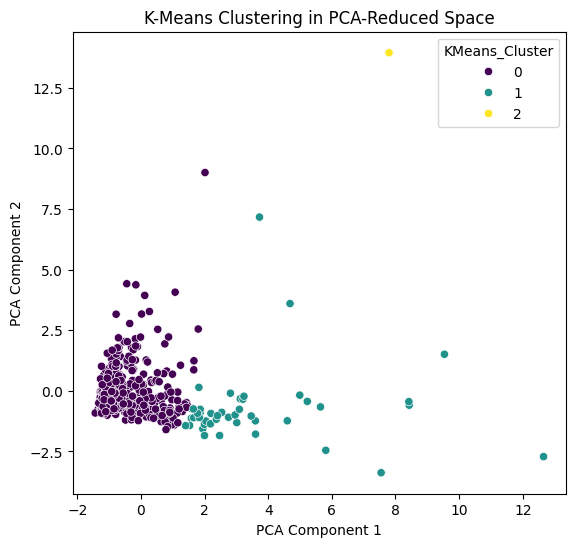

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', data=pca_df, legend='full')
plt.title('K-Means Clustering in PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

Evaluating the Optimal Number of Clusters

Task: Determine the optimal number of clusters for the Wholesale Customers dataset using the Elbow Method and Silhouette Score. 

Visualize the results and justify your choice.


<function matplotlib.pyplot.show(close=None, block=None)>

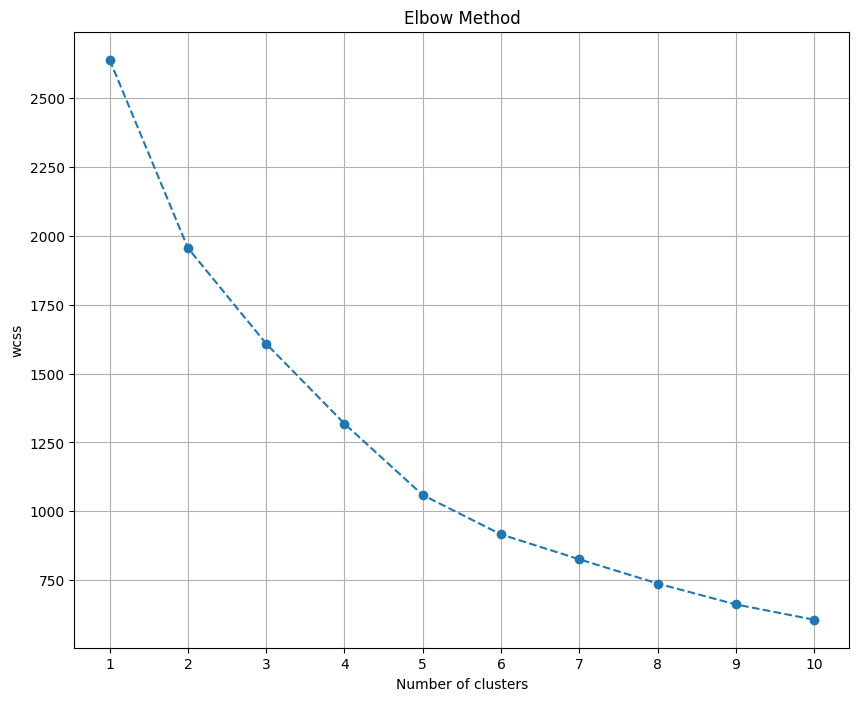

In [67]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    km= KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(standardized_features)
    wcss.append(km.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.title("Elbow Method")
plt.xticks(range(1,11))
plt.grid(True)
plt.show

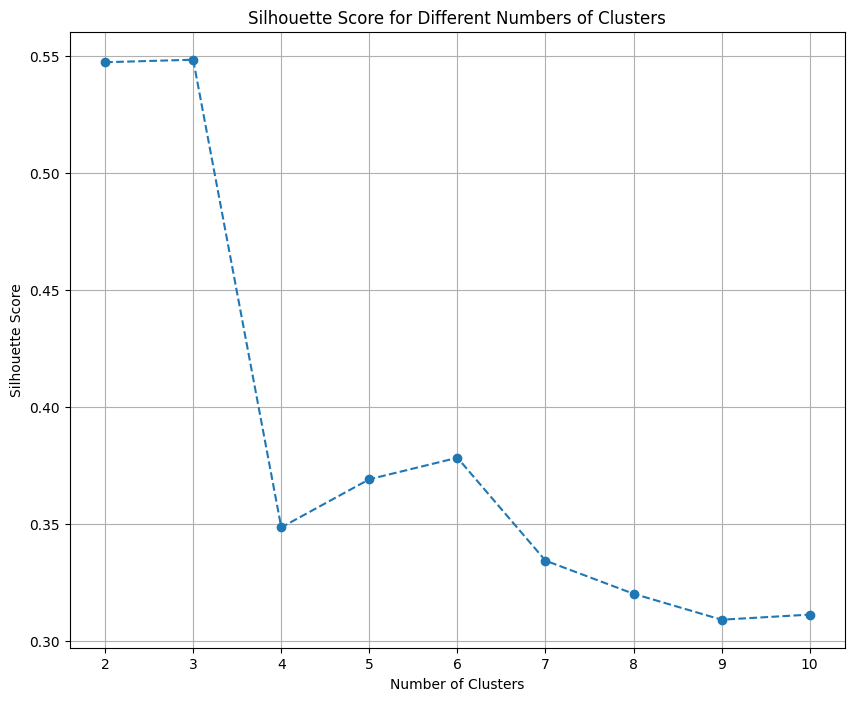

In [68]:
from sklearn.metrics import silhouette_score
silhouette_scores=[]
for i in range(2,11):
    km= KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(standardized_features)
    labels= km.labels_
    scores= silhouette_score(standardized_features, labels)
    silhouette_scores.append(scores)

plt.figure(figsize=(10, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()    

Cluster Analysis and Interpretation

Task: Interpret the clusters formed in the Wholesale Customers dataset.

 Identify the characteristics and differences among the clusters based on spending behavior.


In [69]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=0)
kmean.fit(standardized_features)
cluster_labels = kmean.fit_predict(standardized_features)


In [70]:
df['Cluster'] = cluster_labels


In [71]:
cluster = df.groupby('Cluster').mean()
print(cluster)

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.876190  2.571429   5671.504762  10238.904762  16269.771429   
1        1.123839  2.532508  13478.950464   3244.826625   3936.210526   
2        1.833333  2.583333  27576.833333  35599.416667  43236.666667   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0        1394.495238       7050.542857  1759.838095  
1        3463.978328        888.588235  1192.123839  
2        7196.916667      20044.666667  8425.333333  


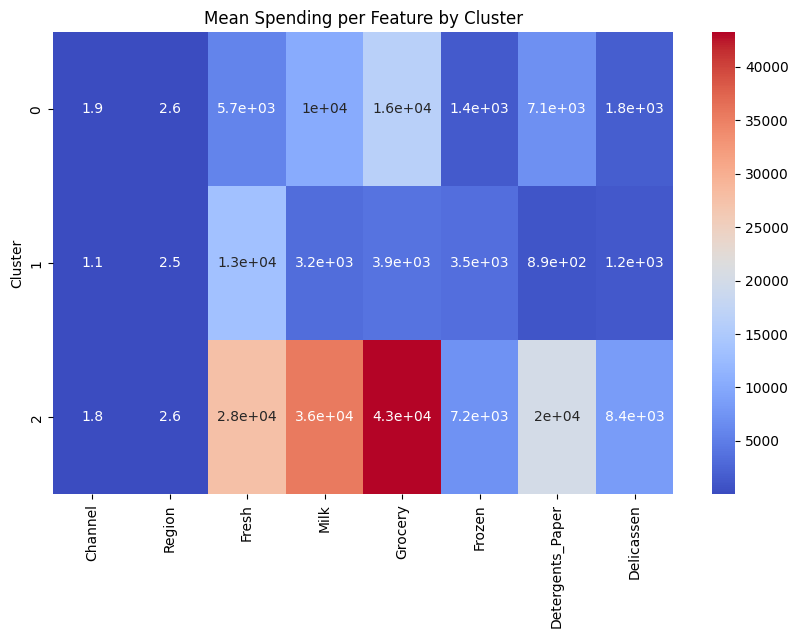

In [72]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(cluster, annot=True, cmap='coolwarm')
plt.title('Mean Spending per Feature by Cluster')
plt.show()


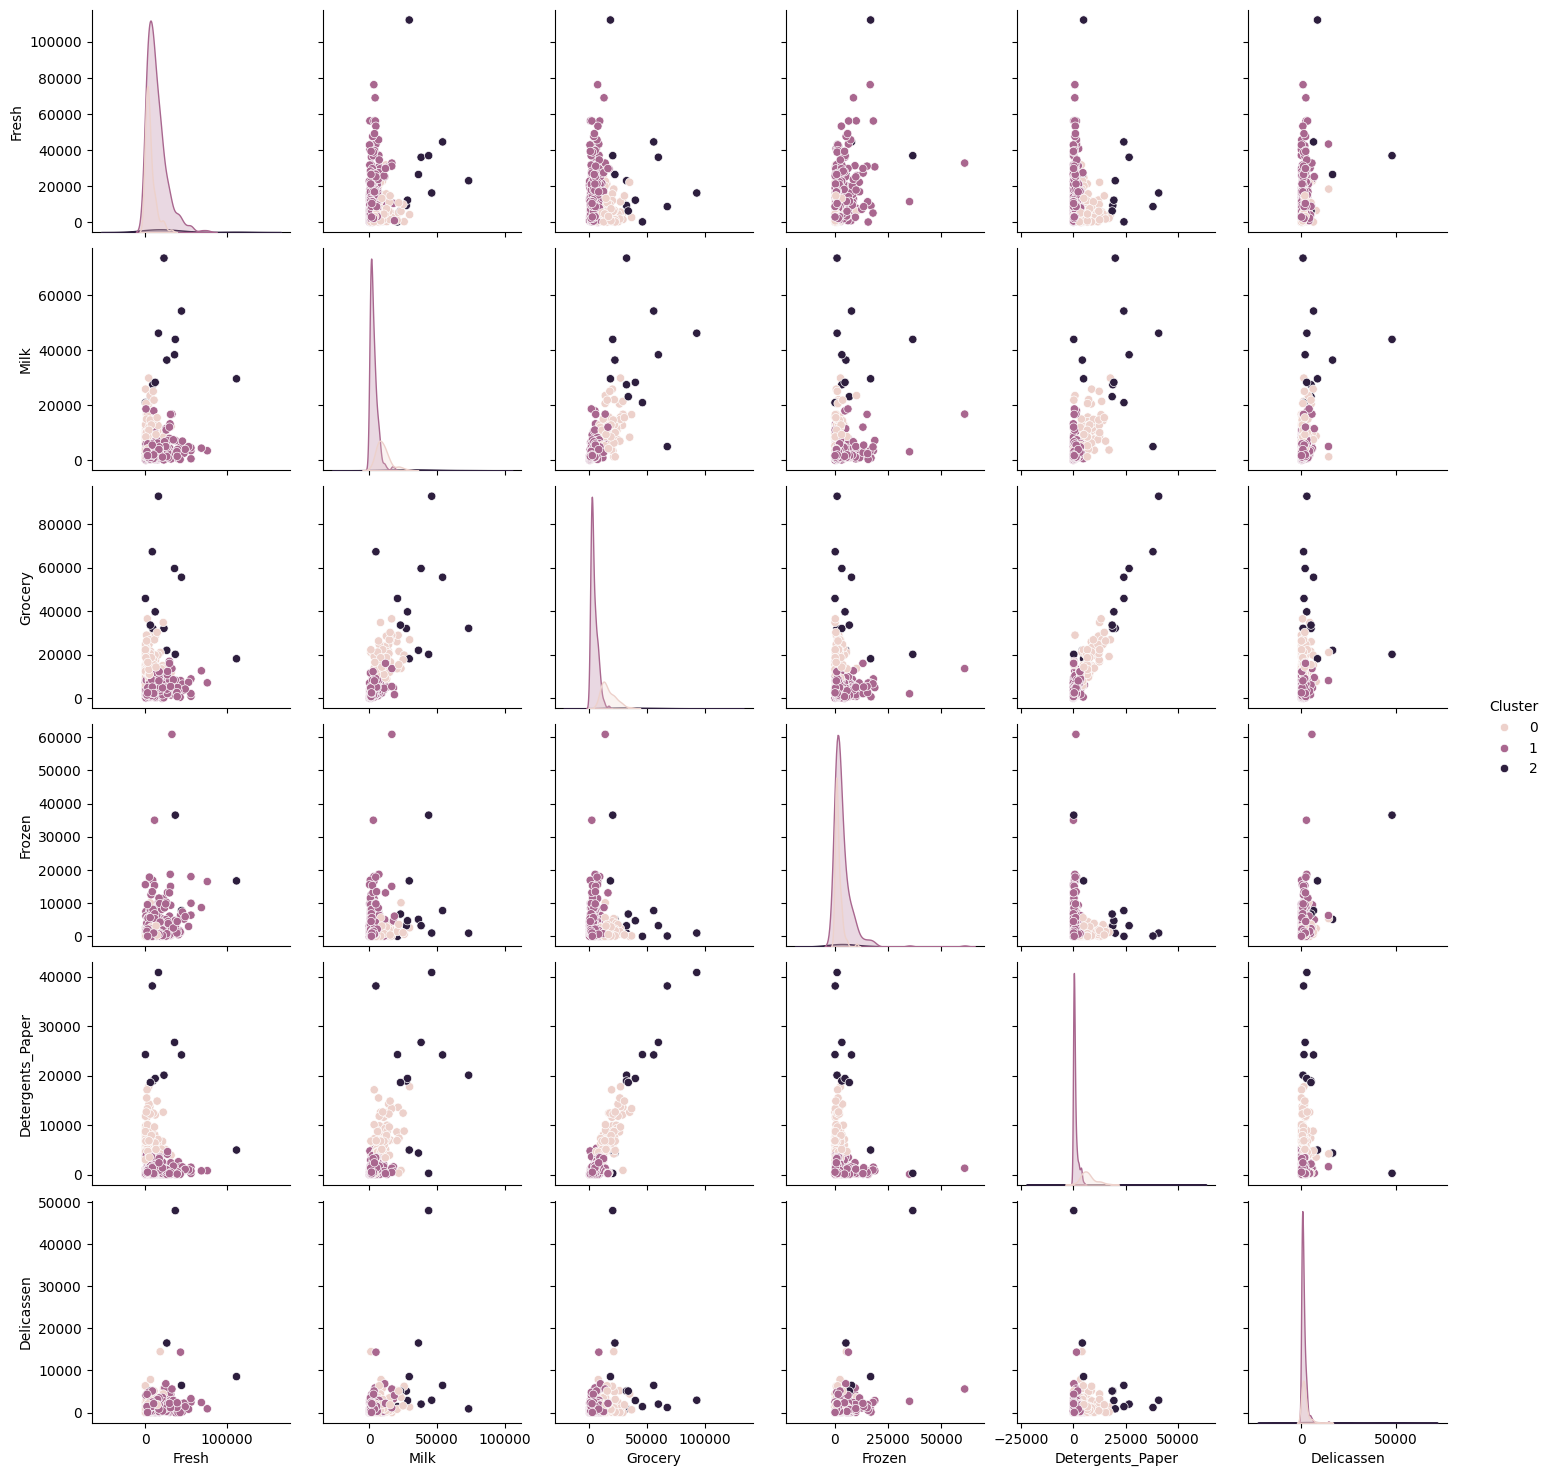

In [73]:
sns.pairplot(df, hue='Cluster', vars=X.columns)
plt.show()

Hierarchical Clustering: Dendrogram and Cluster Formation

Task: Apply hierarchical clustering to the Wholesale Customers dataset and visualize the dendrogram.

 Compare the cluster assignments with those obtained from K-Means.


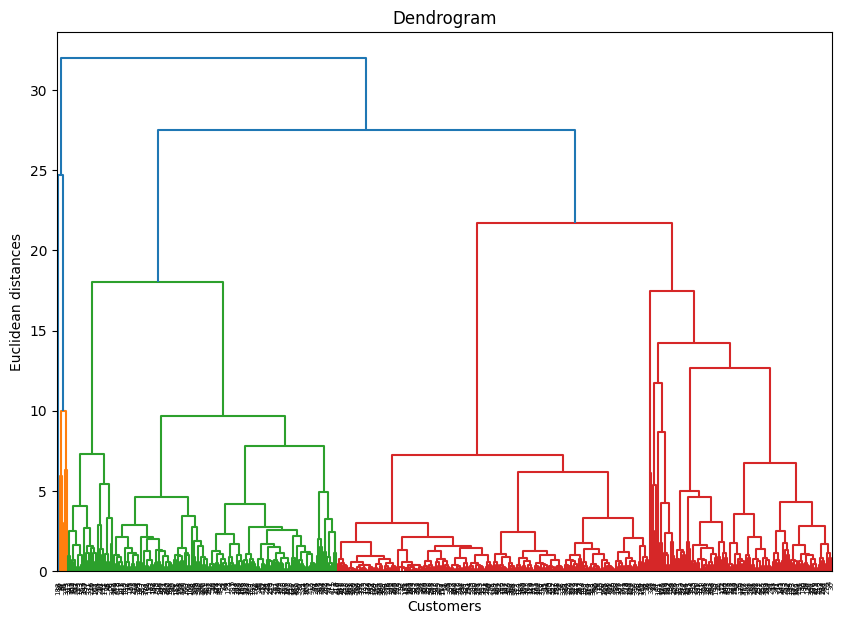

In [74]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(standardized_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()